In [1]:
import matplotlib.pyplot as plt
import polars as pl

import numpy as np
import pandas as pd

import polars as pl
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [18]:
df_train = pl.read_parquet('../experiments/datasets/master_card_basic/train.parquet')
df_test = pl.read_parquet('../experiments/datasets/master_card_basic/test.parquet')

transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,lat,long,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud,age_user,sex_user,education_user,primary_source_of_income_user,sum_of_monthly_installments_user,sum_of_monthly_expenses_user,country_user,signup_date_user,risk_score_user,category_merchant,country_merchant,trust_score_merchant,number_of_alerts_last_6_months_merchant,avg_transaction_amount_merchant,account_age_months_merchant,has_fraud_history_merchant
str,datetime[μs],cat,cat,f64,cat,cat,cat,f64,f64,cat,i64,i64,i64,i64,i64,cat,cat,cat,f64,f64,cat,date,f64,cat,cat,f64,i64,f64,i64,i64
"""TX497783""",2022-01-01 00:06:00,"""U04367""","""M0197""",41.78,"""in-store""","""EUR""","""Android""",53.688447,36.092441,"""mobile_payment""",1,222,0,0,59,"""Female""","""PhD""","""Student Aid""",427.75,997.08,"""Netherlands""",2022-02-02,0.696529,"""electronics""","""Germany""",0.867635,1,85.26,79,1
"""TX087684""",2022-01-01 00:12:00,"""U07964""","""M0056""",77.36,"""online""","""EUR""","""Android""",68.951114,13.106446,"""debit_card""",1,308,0,0,22,"""Male""","""High School""","""Unemployment""",125.4,402.97,"""Finland""",2023-11-01,0.397698,"""travel""","""Belgium""",0.756445,3,24.93,69,0
"""TX466651""",2022-01-01 00:12:00,"""U02226""","""M0496""",160.69,"""in-store""","""EUR""","""Android""",35.875333,-1.288573,"""bank_transfer""",1,874,1,0,22,"""Other""","""PhD""","""Retirement""",53.3,805.98,"""Denmark""",2020-06-27,0.619942,"""clothing""","""Sweden""",0.887738,2,94.39,79,1
"""TX005076""",2022-01-01 00:13:00,"""U04685""","""M0484""",45.19,"""in-store""","""EUR""","""Web""",60.437928,38.060866,"""debit_card""",1,1200,1,0,40,"""Other""","""Bachelor""","""Student Aid""",554.37,615.45,"""Netherlands""",2020-08-16,0.330483,"""travel""","""Spain""",0.596116,5,23.05,31,1
"""TX429480""",2022-01-01 00:14:00,"""U13341""","""M0960""",10.76,"""online""","""EUR""","""Web""",40.255723,14.582348,"""bank_transfer""",1,1034,1,0,72,"""Other""","""Master""","""Unemployment""",109.87,496.5,"""Poland""",2022-08-20,0.393215,"""education""","""Portugal""",0.857549,0,82.35,82,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TX090047""",2023-12-31 23:51:00,"""U03235""","""M0801""",25.85,"""in-store""","""EUR""","""Android""",45.277347,36.771153,"""credit_card""",1,62,1,0,36,"""Female""","""Master""","""Employment""",13.36,293.94,"""Finland""",2024-04-07,0.623402,"""travel""","""Poland""",0.704613,3,38.33,36,0
"""TX322305""",2023-12-31 23:53:00,"""U11958""","""M0124""",13.04,"""in-store""","""EUR""","""iOS""",40.133445,5.368592,"""bank_transfer""",0,992,1,0,42,"""Female""","""PhD""","""Unemployment""",124.44,1616.87,"""Poland""",2024-01-13,0.614074,"""restaurants""","""Poland""",0.751758,3,448.33,16,1
"""TX112068""",2023-12-31 23:54:00,"""U04945""","""M0552""",17.12,"""in-store""","""EUR""","""Web""",36.051268,39.143661,"""bank_transfer""",1,77,1,0,21,"""Male""","""PhD""","""Unemployment""",316.76,2362.34,"""Poland""",2024-02-18,0.468036,"""electronics""","""Denmark""",0.626142,2,14.07,20,0


In [15]:
from mastercard.models.mc_lgbm_basic import src

user_statistics, _ = src.compute_user_time_statistics(df_train)
for stats in user_statistics.values():
    df_train = df_train.join_asof(stats, on="timestamp", by="user_id")
df_train, _ = src.compute_time_features(df_train)

/tmp/ipykernel_2346/2013814837.py:5: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  df_train = df_train.join_asof(stats, on="timestamp", by="user_id")


/tmp/ipykernel_2346/1021157984.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(8, 4))


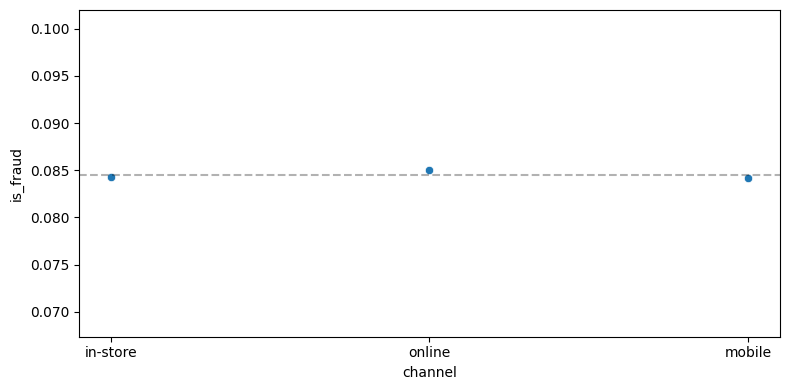

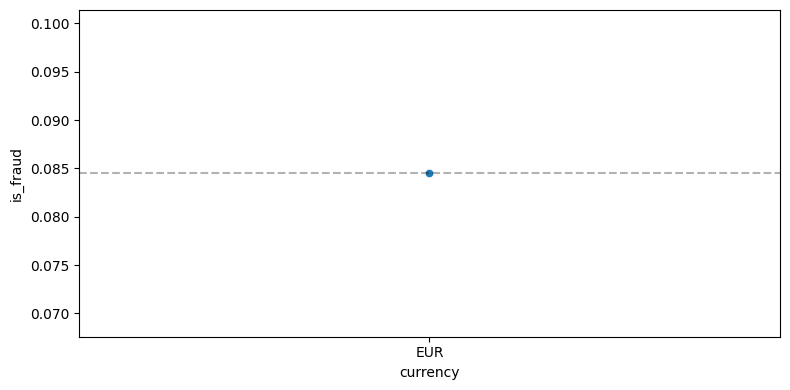

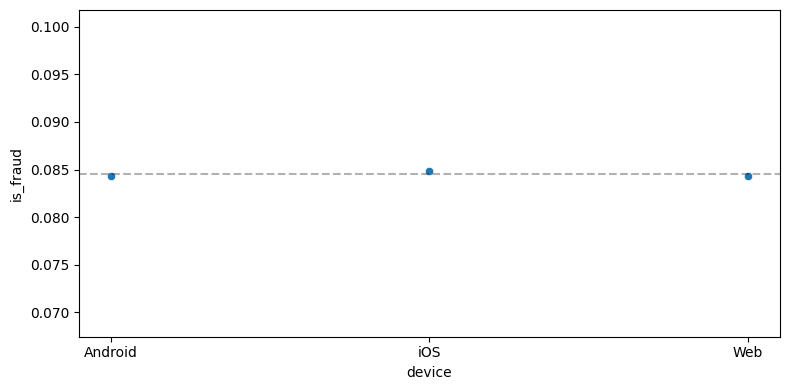

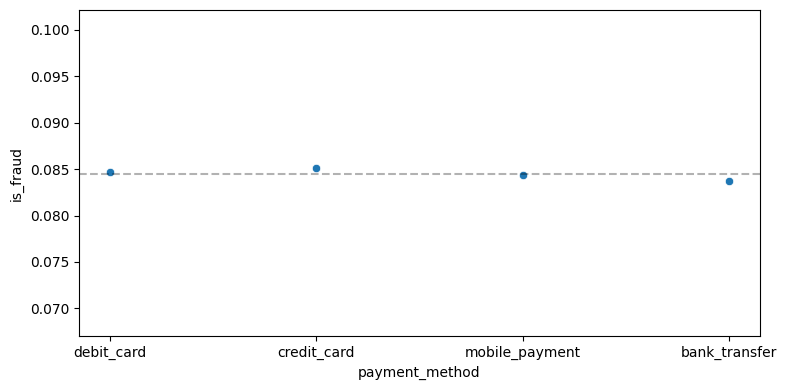

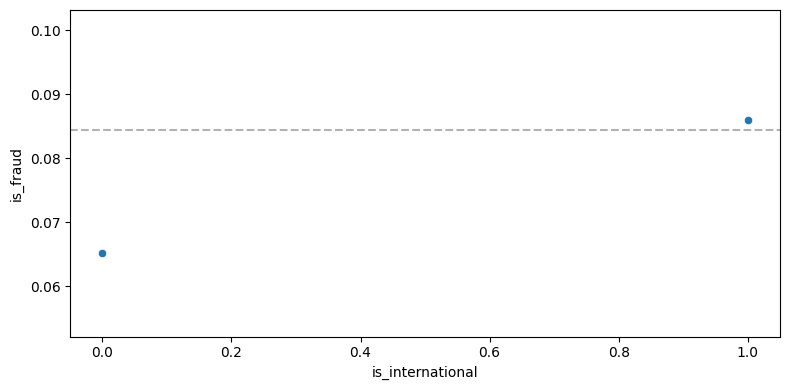

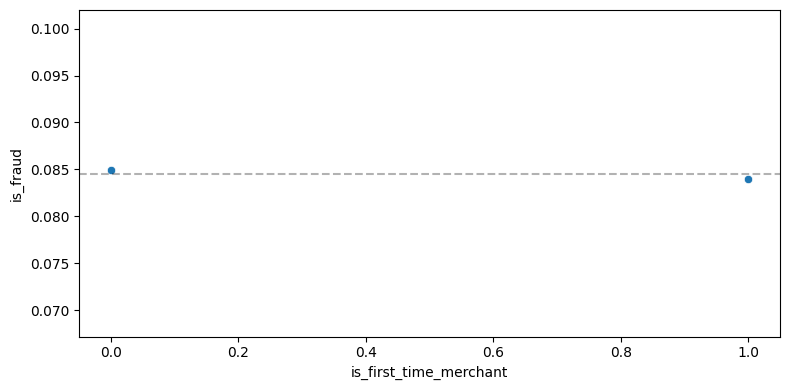

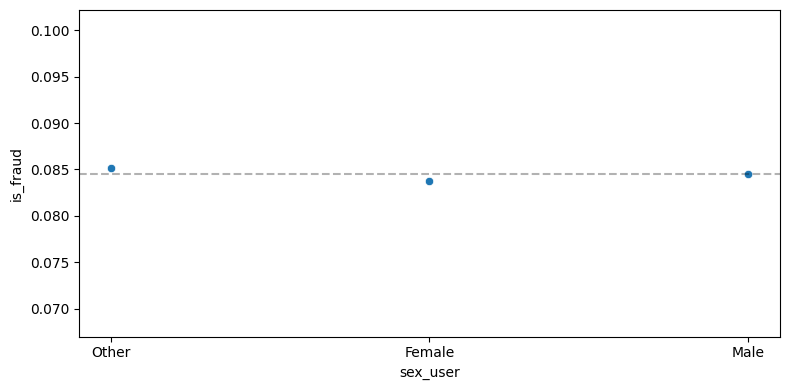

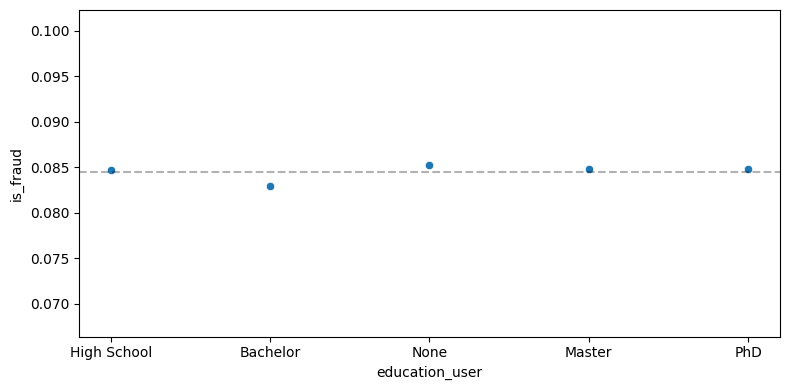

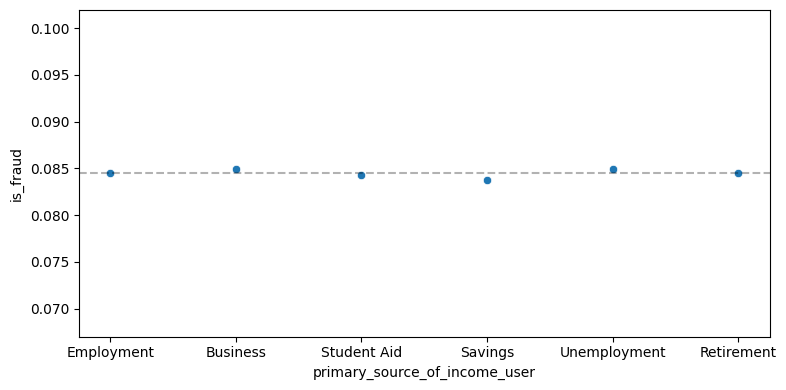

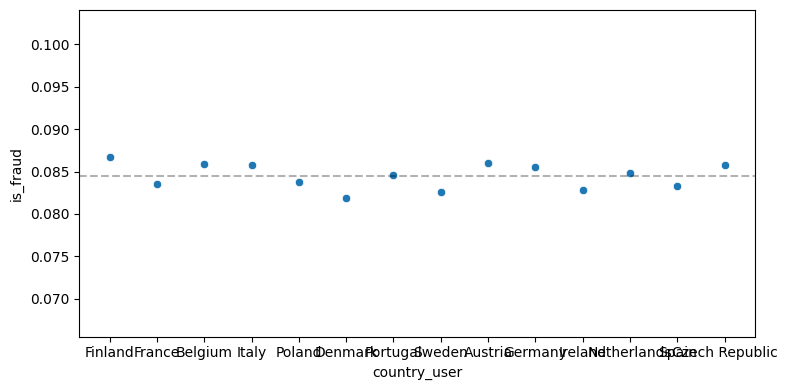

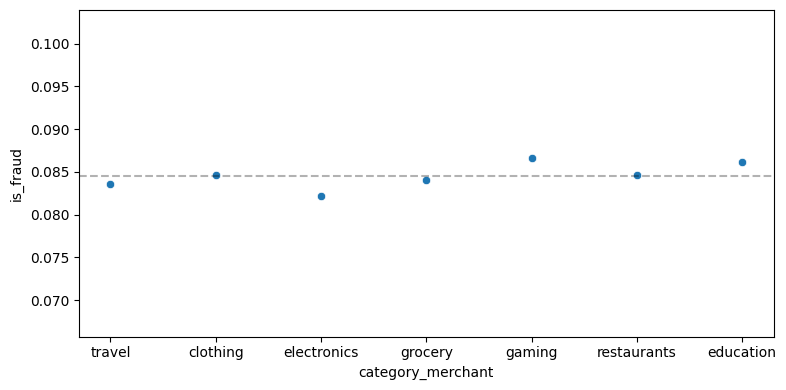

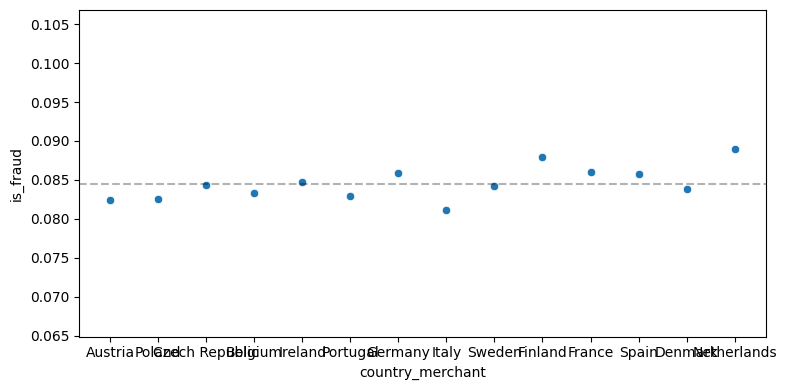

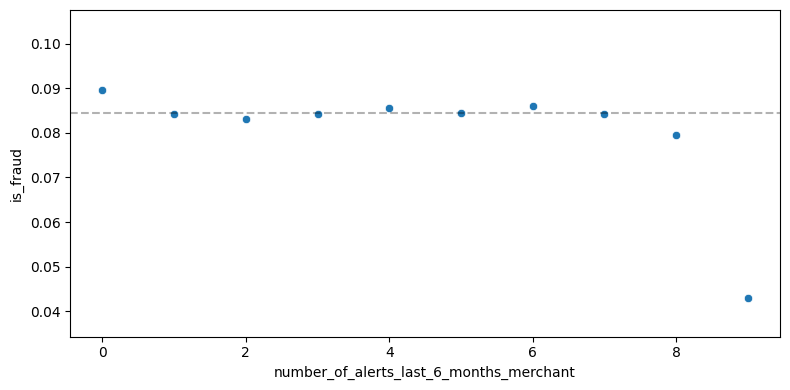

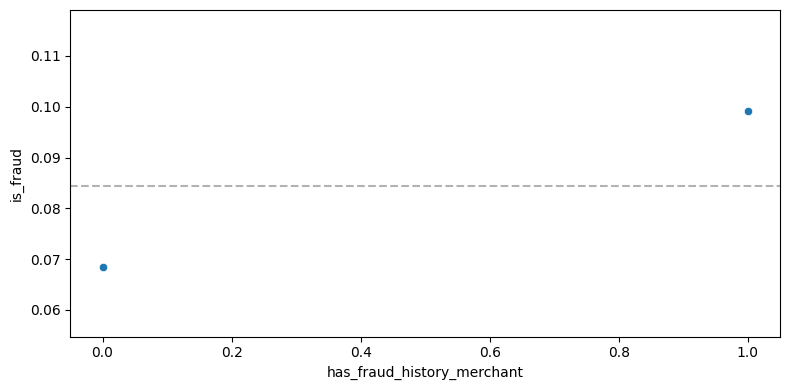

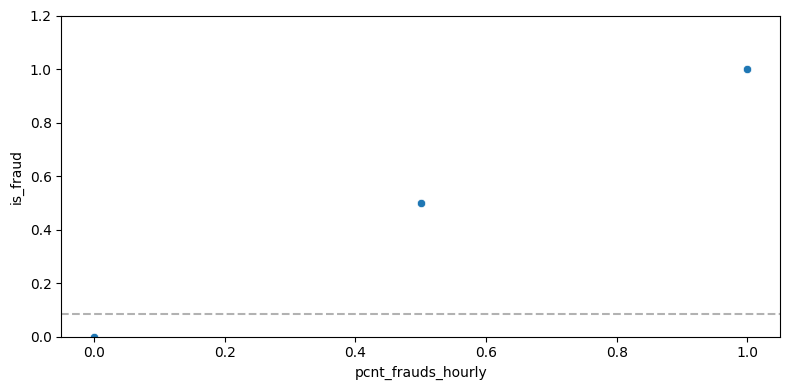

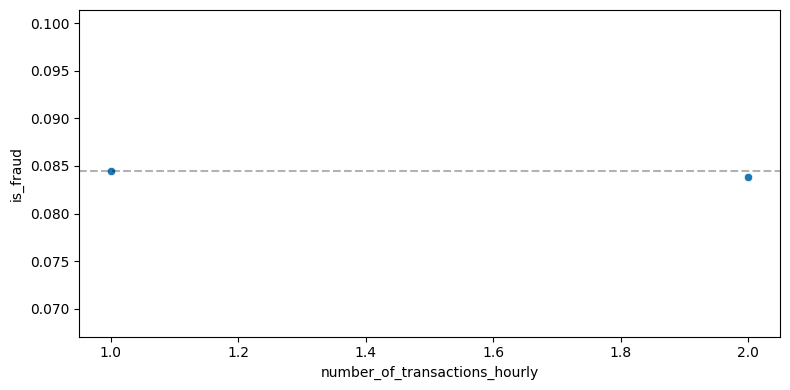

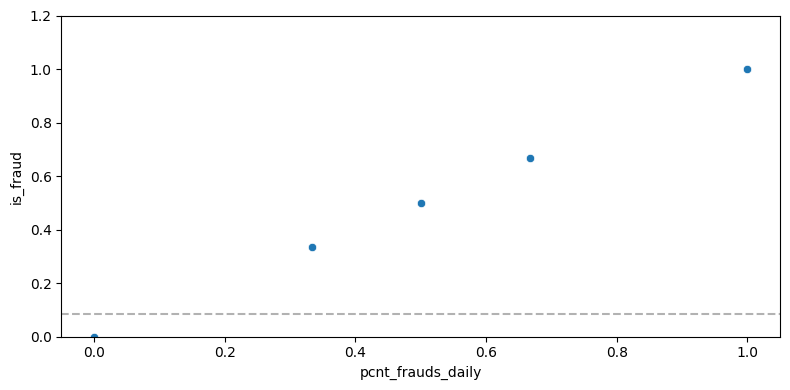

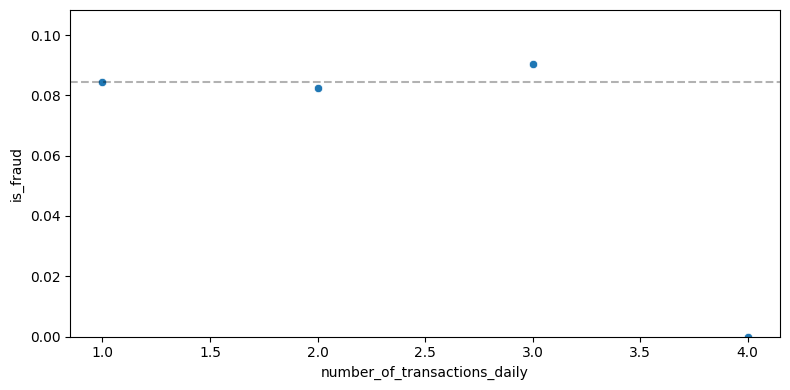

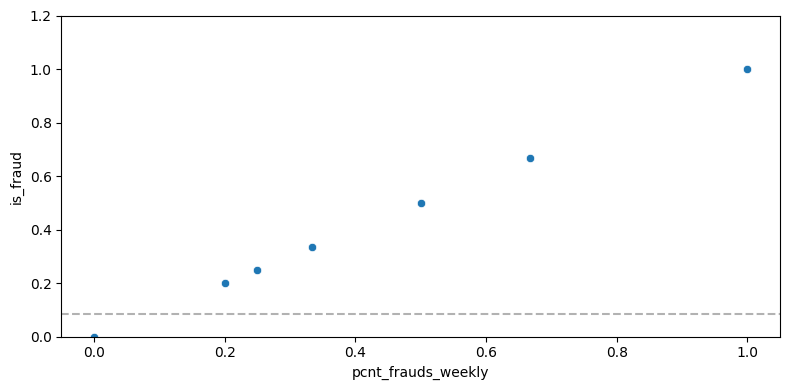

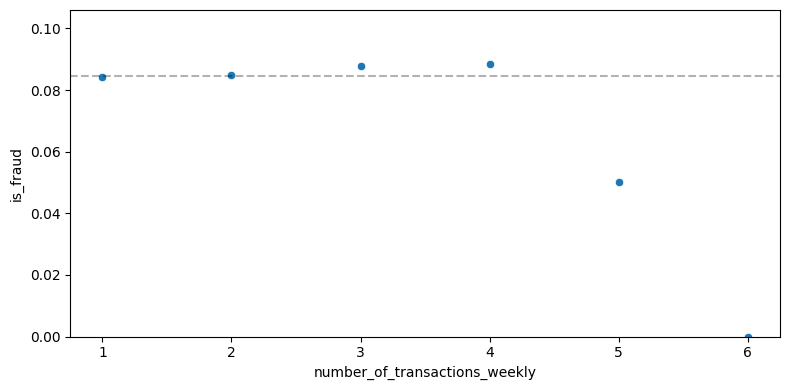

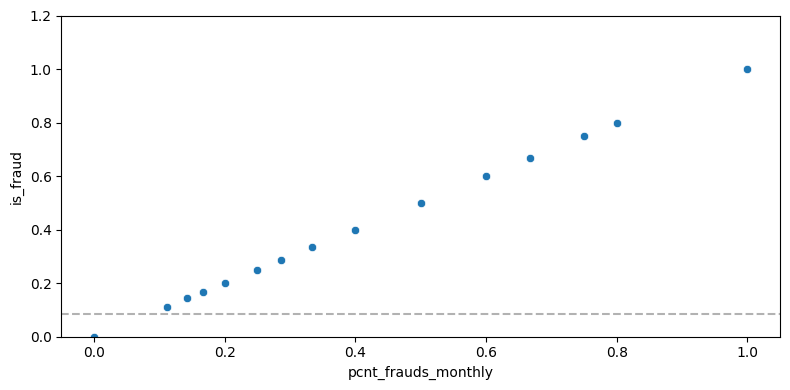

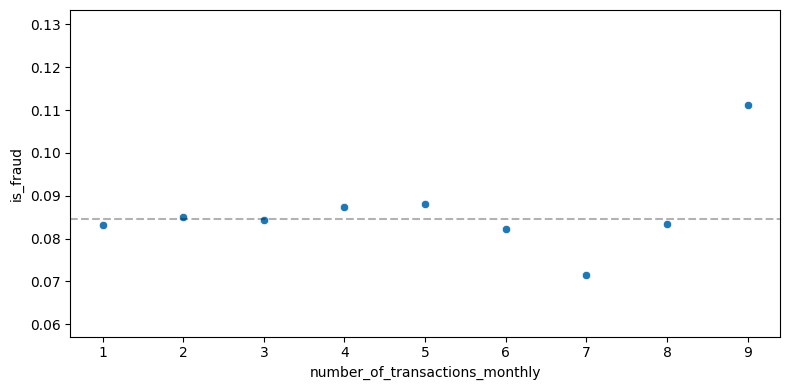

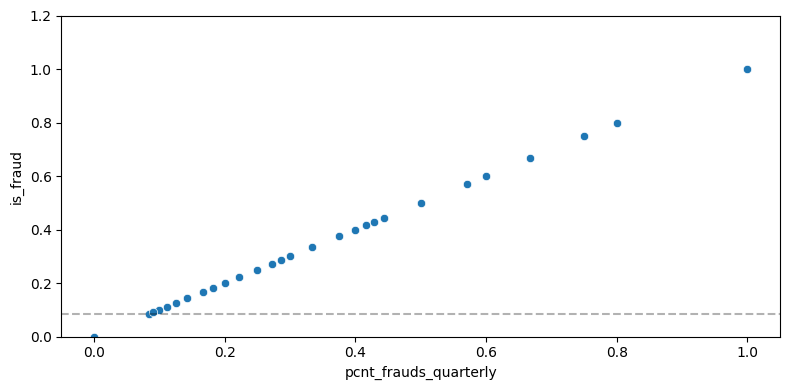

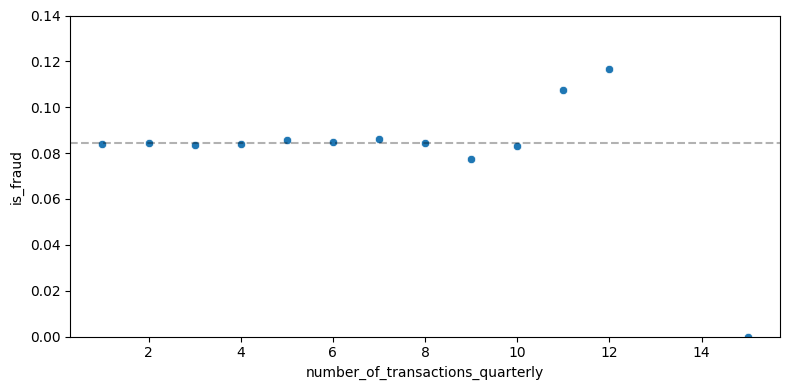

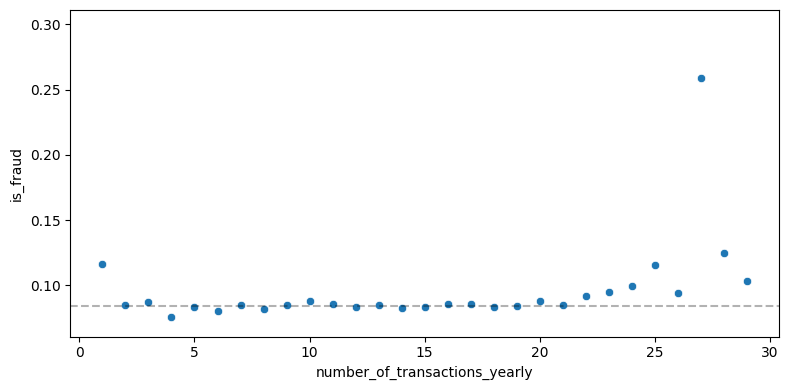

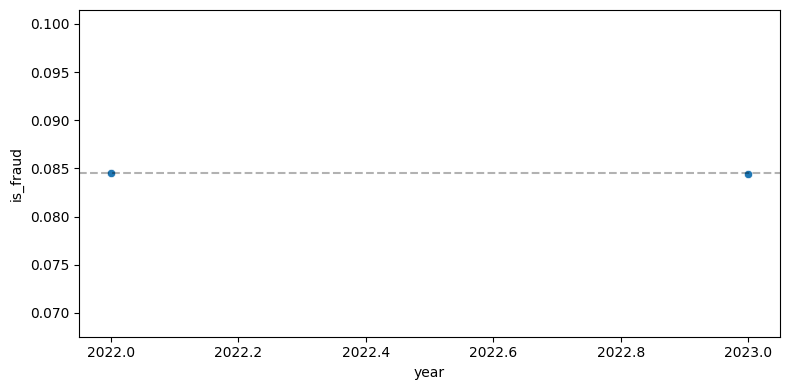

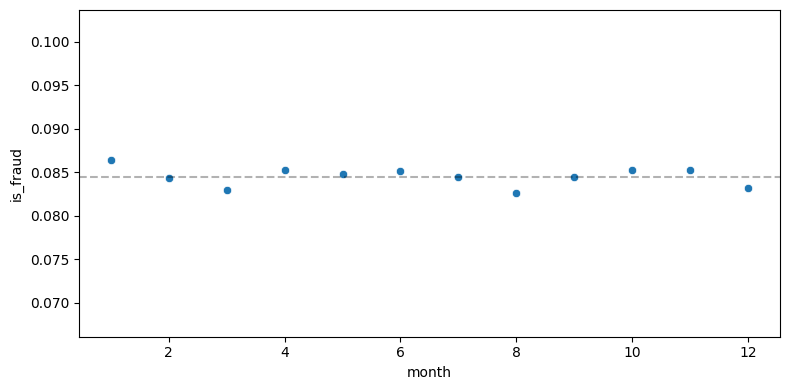

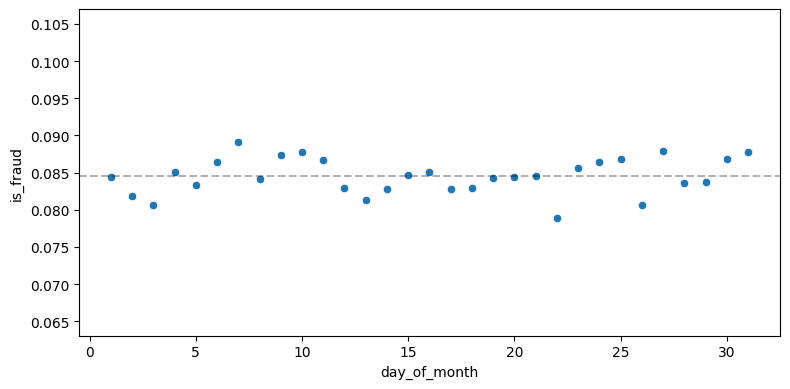

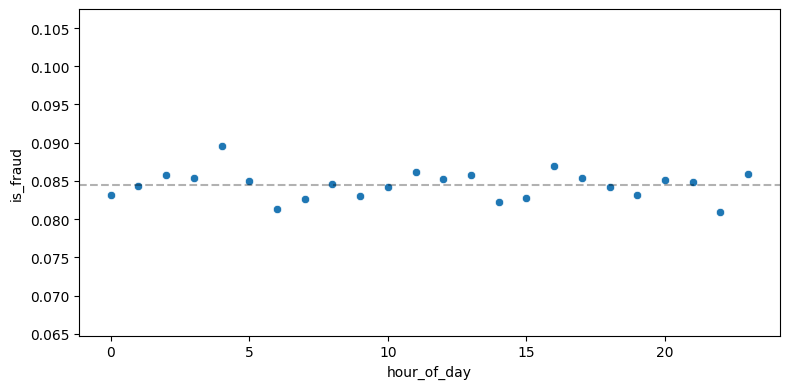

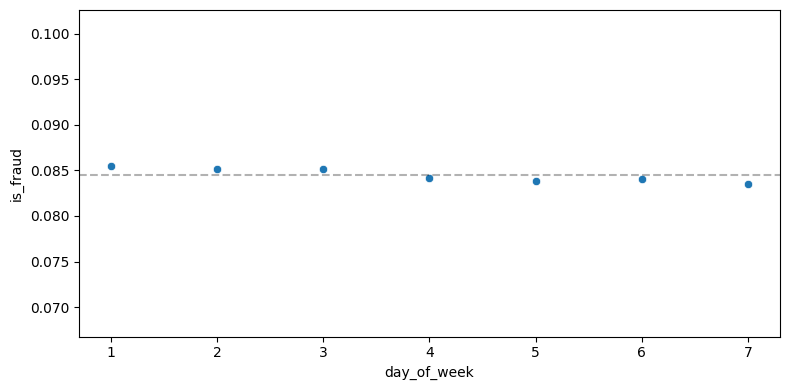

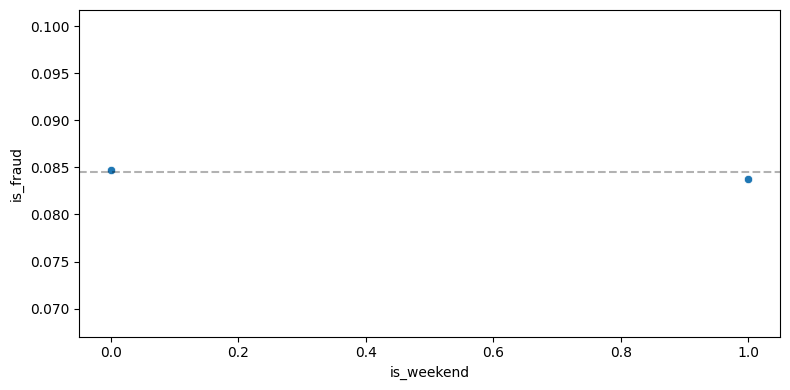

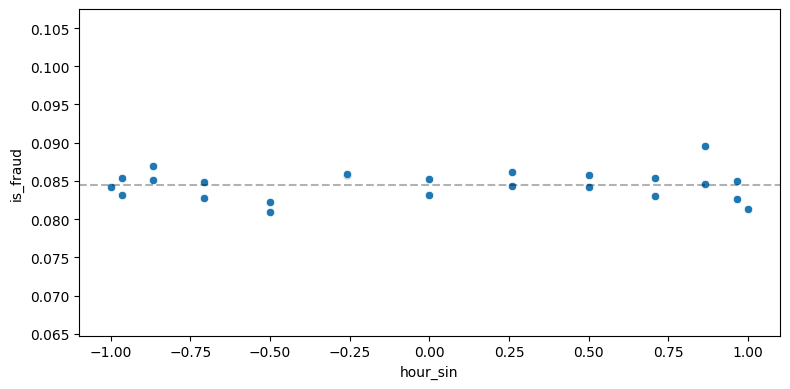

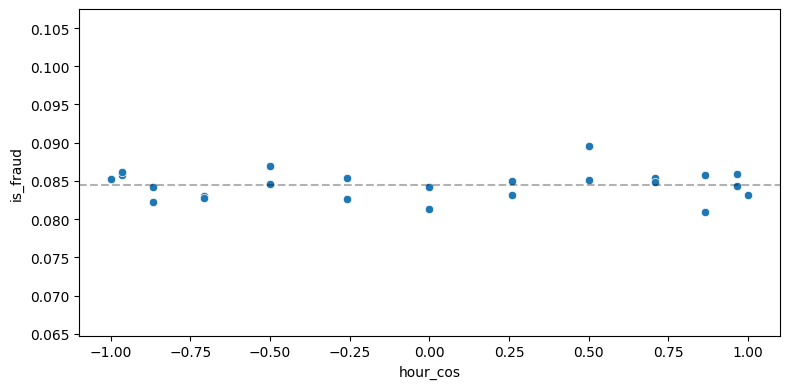

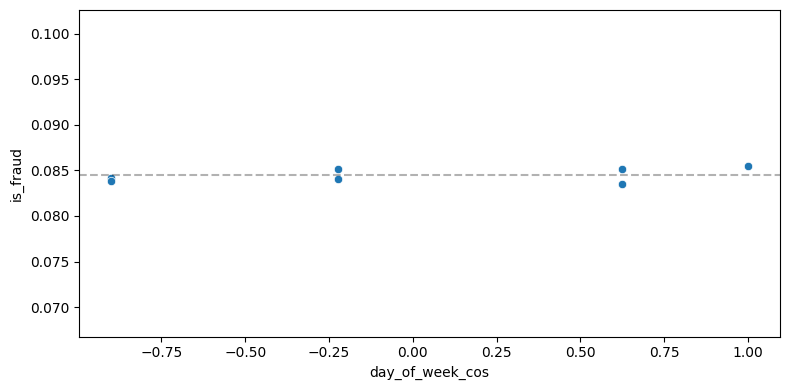

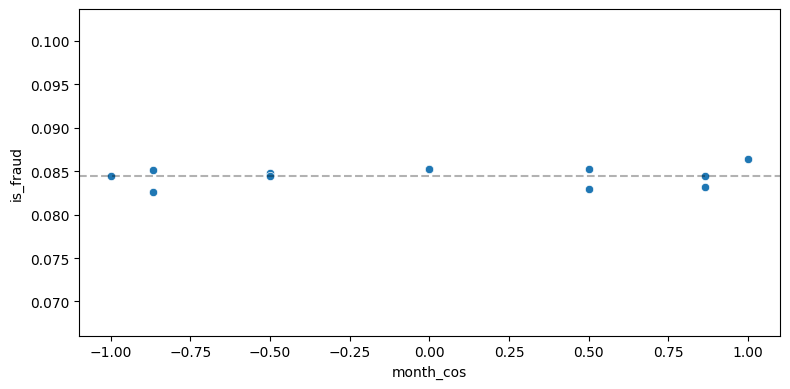

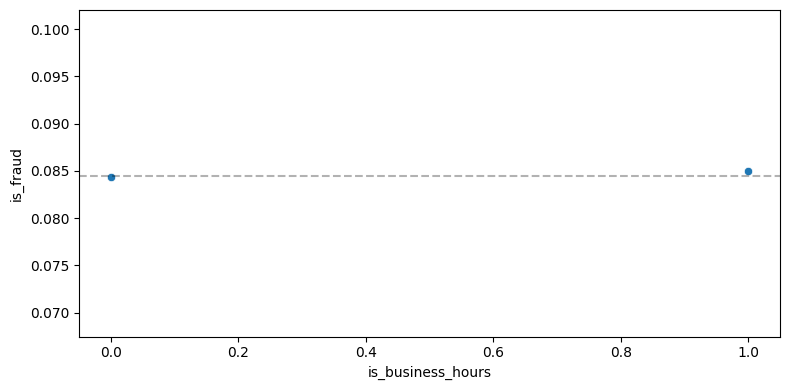

In [16]:
import seaborn as sns
for col in [i for i in df_train.columns if i!= 'is_fraud']:
    
    if len(df_train[col].unique()) > 50:
        continue
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))


    x = df_train.group_by(col).agg(pl.col('is_fraud').sum() /pl.col('is_fraud').len() )
    sns.scatterplot(x, x =col, y='is_fraud', ax=ax)
    ax.axhline(df_train['is_fraud'].mean(), color='k', linestyle='--', alpha=0.3)
    mi, ma = x['is_fraud'].min(), x['is_fraud'].max(), 
    ax.set_ylim([mi*0.8, ma*1.2])
    fig.tight_layout()